Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes  
```python 
#LA REPONSE ICI
raise NotImplementedError()
``` 
par vos réponses, et remplissez les champs ci-dessous:

In [81]:
NOM = "Martinez"
PRENOM = "Maud"
GROUPE = "1"
DATE = "15/10/20196"

---

# TD 4: Résolution d'équations

## Exercice 1 : Recherche du minimum d'une fonction

On s'intéresse à la fonction $f(x)=x^2-x-1$, dont la racine positive est le fameux nombre d'or.
- Définir et tracer la fonction.


In [82]:
import numpy as np
from matplotlib import pyplot as plt

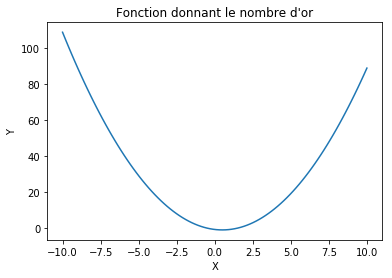

In [83]:
def fonct(x): 
    return x**2-x-1

X= np.linspace(-10,10,100)
Y=fonct(X)

fig=plt.figure()
plt.plot(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Fonction donnant le nombre d'or")
plt.show()

- Écrire une fonction `minimum` qui prend pour arguments $f,a,b,N$ et retourne l'abscisse du premier minimum.
- Rechercher la valeur du minimum de cette fonction et son abscisse. Comparer avec le résultat attendu.

In [84]:
def minimum(f,a,b,N):
    X= np.linspace(a,b,N)
    Y=f(X)
    return X[np.argmin(Y)]

In [85]:
def racine(f,a,b,N):
    X= np.linspace(a,b,N)
    Y=np.abs((f(X)))
    return X[np.argmin(Y)]

In [86]:
m= minimum(fonct,-5,5,10000000)
print('Le minimum de f est', fonct(m),"d'abscisse",m)

Le minimum de f est -1.2499999999997975 d'abscisse 0.49999954999995566


In [87]:
r=racine(fonct,0,5,100)
print('La racine de f est', fonct(m),"d'abscisse",m)

La racine de f est -1.2499999999997975 d'abscisse 0.49999954999995566


- Comparer l'écart entre la valeur théorique et le résultat obtenu avec la taille du pas de discrétisation de la fonction, puis tenter d'avoir une précision à $10^{-12}$.


YOUR ANSWER HERE

In [88]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 


On s'intéresse maintenant à la fonction $g(x)=x^4 - x^2 + 0.3848x$.
- Définir et tracer la fonction.



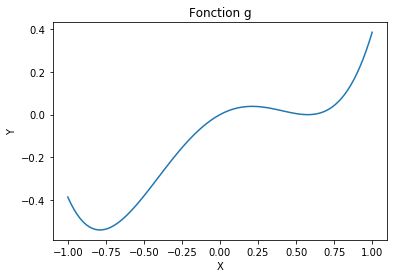

In [89]:
def g(x):
    return x**4-x**2+0.3848*x

X= np.linspace(-1,1,100)
Y=g(X)

fig=plt.figure()
plt.plot(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Fonction g")
plt.show()

- Rechercher la valeur du minimum d'abscisse ''positive'' de cette fonction et son abscisse. Faites varier la taille du pas de discrétisation et constater son importance (essayez un pas de 0.1).

In [90]:
def minPas(f,a,b,N):
    X= np.arange(a,b,N)
    Y=f(X)
    return X[np.argmin(Y)]

for N in range(1,7):
    m= minPas(g,0,5,10**-N)
    print('Le minimum de f est', fonct(m),"d'abscisse",m,"avec un pas de discrétisation de",10**-N)

Le minimum de f est -1.0 d'abscisse 0.0 avec un pas de discrétisation de 0.1
Le minimum de f est -1.2436 d'abscisse 0.58 avec un pas de discrétisation de 0.01
Le minimum de f est -1.244071 d'abscisse 0.577 avec un pas de discrétisation de 0.001
Le minimum de f est -1.24400924 d'abscisse 0.5774 avec un pas de discrétisation de 0.0001
Le minimum de f est -1.24400924 d'abscisse 0.5774 avec un pas de discrétisation de 1e-05
Le minimum de f est -1.24400924 d'abscisse 0.5774 avec un pas de discrétisation de 1e-06


## Exercice 2 : Méthode de la dichotomie

- Ecrire en python un algorithme de recherche du zéro d'une fonction par la méthode de la dichotomie dans une fonction `dichotomie` qui prendra pour argument $f,a,b,\epsilon $ et retourne le zéro recherché.

In [108]:
def dichotomie(f,a,b,e):
    c=0
    while (b-a)>e :
        c += 1
        x=(a+b)/2
        y=f(x)
        
        if f(a)*y >0:
            a = x
        else : 
            b = x
    return x,c

- Appliquer l'algorithme à la recherche du nombre d'or avec une précision $\epsilon = 10^{-12}$.


In [109]:
O,c = dichotomie(fonct,0,3,10**-12)
print("L'approximation du nombre d'or est de",O,"avec une précision de",10**-12)

L'approximation du nombre d'or est de 1.6180339887498576 avec une précision de 1e-12


- Compter et afficher le nombre N d'itérations nécessaires, à renvoyer aussi avec le zéro par la fonction `dichotomie`. Constater que le choix de l'intervalle initial n'est pas très important tant qu'un seul zéro est contenu dans cet intervalle.


In [111]:
O,C=dichotomie(fonct,0,3,10**-15)
print("L'approximation du nombre d'or est de",O,"avec une précision de",10**-14,"et utilise",C,"itérations")

L'approximation du nombre d'or est de 1.6180339887498942 avec une précision de 1e-14 et utilise 52 itérations


- Tracer le nombre d'itérations en fonction de la précision demandée, pour $\epsilon \in [10^{-3},10^{-15}]$. Quelle loi mathématique la convergence semble suivre en fonction de la précision ?


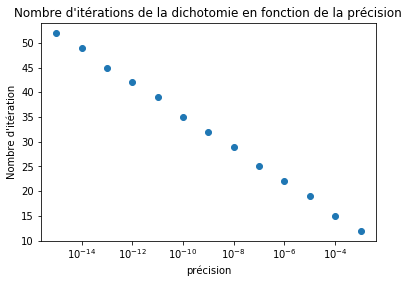

In [127]:
E=1/10**np.arange(3,16)
Y=[dichotomie(fonct,0,3,e)[1] for e in E]



fig=plt.figure()   
plt.plot(E,Y,linestyle='None', marker='o')
plt.xscale('log')
plt.xlabel('précision')
plt.ylabel("Nombre d'itération")
plt.title("Nombre d'itérations de la dichotomie en fonction de la précision")
plt.show()

## Exercice 3 : Méthode de Newton

- Écrire en python un  algorithme de recherche du zéro d'une fonction par la méthode de Newton dans une fonction `newton` qui prendra pour argument $f,f',x_0,\epsilon$ et retourne le zéro recherché.

In [122]:
def newton(f,fd,xo,e):
    X1=xo
    X2=xo-f(xo)/fd(xo)
    c=0
    
    while np.abs(X2-X1)>e :
        c+=1
        X1=X2
        X2=X1-f(X1)/fd(X1)
    return X2,c
        

- Appliquer l'algorithme à la recherche du nombre d'or avec une précision $\epsilon = 10^{-12}$.


In [126]:
def der_fonct(x):
    return 2*x-1

x,C= newton(fonct,der_fonct,1.5,10**-12)
print("L'approximation du nombre d'or est de",x,"avec une précision de",10**-3,"et utilise",C,"itérations")

L'approximation du nombre d'or est de 1.618033988749895 avec une précision de 0.001 et utilise 4 itérations


- Tracer le nombre d'itérations en fonction de la précision demandée, pour $\epsilon \in [10^{-3},10^{-15}]$. Comparer à la méthode de la dichotomie, puis tester la sensibilité de l'algorithme au choix de $x_0$


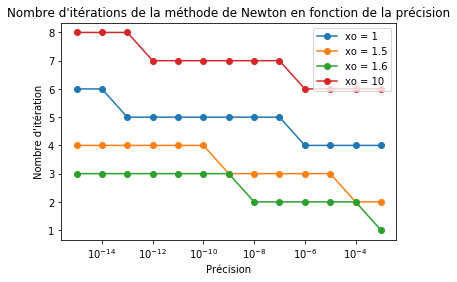

In [140]:
E=1/10**np.arange(3,16)

fig=plt.figure() 

for xo in [1,1.5,1.6,10]:
    Y=[newton(fonct,der_fonct,xo,e)[1] for e in E]
  
    plt.plot(E,Y, marker='o',label='xo = '+str(xo))
plt.xscale('log')
plt.legend()
plt.xlabel('Précision')
plt.ylabel("Nombre d'itération")
plt.title("Nombre d'itérations de la méthode de Newton en fonction de la précision")
plt.show()

- Comparer les résultats obtenus avec la valeur renvoyée par la librairie Python `math`. En déduire un ordre de grandeur de la précision de cette dernière.

In [141]:
import scipy.optimize as opt
print(opt.fsolve(fonct,1.6)[0])
print(x)

1.618033988749895
1.618033988749895


## Exercice 4 : Résolution de systèmes d'équations linéaires

Définir une fonction `solver(A,B)` qui calcule le déterminant de $A$ et résout le système d'équations linéaires $A\cdot X = B$ par la méthode de l'inverse, la décomposition LU et la méthode des moindres carrés. Dans cette fonction on permettra l'impression à l'écran des solutions et du temps mis à les calculer pour chacune des méthodes (utiliser le module `time`). Utiliser cette fonction dans les cas suivants, et commenter chacun des résultats (quel algorithme est le plus adapté, etc) :

Cas 1: $$x_1 + 3 x_2 = 2$$
$$ 4 x_2 + 2x_3 = 0$$
$$x_1 + 6 x_2 -3x_3 = -1$$


In [174]:
import time

def solver_inv(A,B):
    
    t=time.clock()
    x= np.dot(np.linalg.inv(A),B)
    t=time.clock()-t
    #print('solution :',x)
    print('temps de calcul inv :',t)
    
def solver_LU(A,B):
    
    t=time.clock()
    x= np.linalg.solve(A,B)
    t=time.clock() -t
    #print('solution :',x,)
    print('temps de calcul LU :',t)
    
def solver_carré(A,B):
    t=time.clock()
    x= np.linalg.lstsq(A,B,rcond=None)
    t=time.clock() -t
    #print('solution :',x,)
    print('temps de calcul carré :',t)
    
    
    
    

In [170]:
A=np.array([[1,3,0],
            [0,4,2],
            [1,6,-3]])
B=np.array([[2],
            [0],
            [-1]])

solver_inv(A,B)
solver_LU(A,B)
solver_carré(A,B)

temps de calcul : 0.0003030000000023847
temps de calcul : 0.00012000000000966793
temps de calcul : 0.000273000000021284


Cas 2: $$x_1 + 2 x_2 + 3x_3 = 1$$
$$ 4 x_1 + 5x_2 + 6x_3 = 2$$
$$7x_1 + 8x_2 + 9x_3 = 3$$

In [171]:
A=np.array([[1,2,3],
            [4,5,6],
            [7,8,9]])
B=np.array([[1],
            [2],
            [3]])

#solver_inv(A,B)
#solver_LU(A,B)
solver_carré(A,B)

temps de calcul : 0.00015199999998571911


Cas 3: $$x_1 + 2 x_2 + 3x_3 = 1$$
$$ 4 x_1 + 5x_2 + 6x_3 = 2$$
$$7x_1 + 8x_2 + 9x_3 = 3$$
$$10x_1 + 11x_2 + 12x_3 = 4$$


In [172]:
A=np.array([[1,2,3],
            [4,5,6],
            [7,8,9],
            [10,11,12]])
B=np.array([[1],
            [2],
            [3],
            [4]])

#solver_inv(A,B)
#solver_LU(A,B)
solver_carré(A,B)

temps de calcul : 0.00016100000001983972


Cas 4:   $ \forall i\leq N, b_i = i, a_{ii}=i+j+1,\quad \forall i\neq j, a_{ij}=i+j $ pour un système de $N=10,100,1000$ équations linéaires.

In [178]:
#i,j in np.arange(1,N)
def matrix(N):
    A = np.zeros((N,N))
    B=np.zeros((N,1))
    for i in range(N):
        for j in range(N):
            if i==j : 
                A[i][j] =i+1+j+1+1
            else : 
                A[i][j]=i+1+j+1
        B[i][0]=i+1
    return A,B


for n in [10,100,1000] :
    A,B=matrix(n)
    print(n,'équations')
    solver_inv(A,B)
    solver_LU(A,B)
    solver_carré(A,B)


10 équations
temps de calcul inv : 0.0005730000000028213
temps de calcul LU : 0.00026700000000801083
temps de calcul carré : 0.0010039999999946758
100 équations
temps de calcul inv : 0.007184000000023616
temps de calcul LU : 0.00538699999998471
temps de calcul carré : 0.008678000000003294
1000 équations
temps de calcul inv : 0.2780390000000068
temps de calcul LU : 0.09142500000001519
temps de calcul carré : 0.8725680000000011


## Exercice 5 : Position d'équilibre d'un pendule chargé


<img align="center" src="plots/pendule_charge.png" width="50%" />

Soit un pendule de masse $m$, de charge $q$ et de longueur de fil $\ell$. On place à proximité une seconde charge q', aux coordonnées $(x_q,z_q)$. L'énergie potentielle de gravitation du pendule peut s'écrire 

$$ V_g = mgz = -mg\ell \cos\theta$$ 
où $\theta$ est l'angle que le pendule fait avec la verticale. De même l'énergie potentielle électrostatique entre les deux charges s'écrit :

$$ V_e = \frac{1}{4\pi \epsilon_0} \frac{qq'}{\sqrt{(\ell\sin\theta - x_q)^2 + (\ell(1-\cos\theta)-z_q)^2}}$$ 

On sait que le minimum de la fonction est donné par l'annulation de sa dérivée première :

$$ \frac{\mathrm{d} V_e+V_g}{\mathrm{d} \theta} =0 $$

On obtient après quelques lignes de calcul :

$$ \sin \theta + \frac{qq'}{4\pi \epsilon_0 m g } \frac{x_q \cos\theta + (z_q - \ell)\sin \theta}{\left[(\ell\sin \theta - x_q)^2 + (\ell(1-\cos\theta)-z_q)^2\right]^{3/2}} = 0$$

ce qui n'est pas évident à résoudre analytiquement.

Résoudre cette équation par la méthode de la dichotomie. On posera $ c = \frac{qq'}{4\pi \epsilon_0 m g } $ et on tracera $\theta_0$ en fonction de $ c\in[-2,2] $, pour $\ell=1, x_q = 1, z_q=0$. On choisira judicieusement l'intervalle initial. La position d'équilibre suit-elle une loi conforme à ce qu'on s'attend intuitivement ?

In [182]:


def blop(thet, l=1, Xq=1, Zq=0):
    num= Xq*np.cos(thet)+(Zq-l)*np.sin(thet)
    den= ((l*np.sin(thet)-Xq)**2 + (l*(1-np.cos(thet))-Zq)**2)**1.5
    return np.sin(thet)+c*num/den



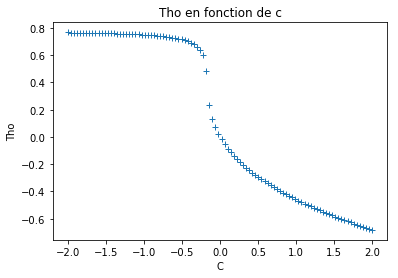

In [187]:
N=100
Tho=np.array([])
C=np.linspace(-2,2,N)
for c in C:
    D= dichotomie(blop,-1,1,10**-3)[0]
    Tho=np.append(Tho,D)

fig=plt.figure()   
plt.plot(C,Tho,linestyle='None', marker='+')
#plt.xscale('log')
plt.xlabel('C')
plt.ylabel("Tho")
plt.title("Tho en fonction de c")
plt.show()